In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene


In [5]:
df = pd.read_csv("../archivos/Metro_Interstate_Traffic_Volume.csv.gz", index_col=0).reset_index()

In [6]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [8]:
df.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516


In [9]:
len(df["date_time"].unique())

40575

In [10]:
df["weather_main"].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 
- Normalidad (evaluada en el pair anterior)


Vimos que la asunción de normalidad sobre nuestra variable respuesta "traffic_volume" nos indica que nuestros datos no son normales, rechazando la H0.

- Cada asunción la deberéis testar de forma visual y analítica.

___

- Homogeneidad de varianzas


Empezamos sacando las gráficas para ver la homogeneidad, la columna "date_time" la obviaremos, dado que no tiene mucho sentido, ya que aunque es de tipo object tiene más de 40000 registros únicos.

In [11]:
df_numericas = df.select_dtypes(include=np.number)

Text(0.5, 0, 'Clima')

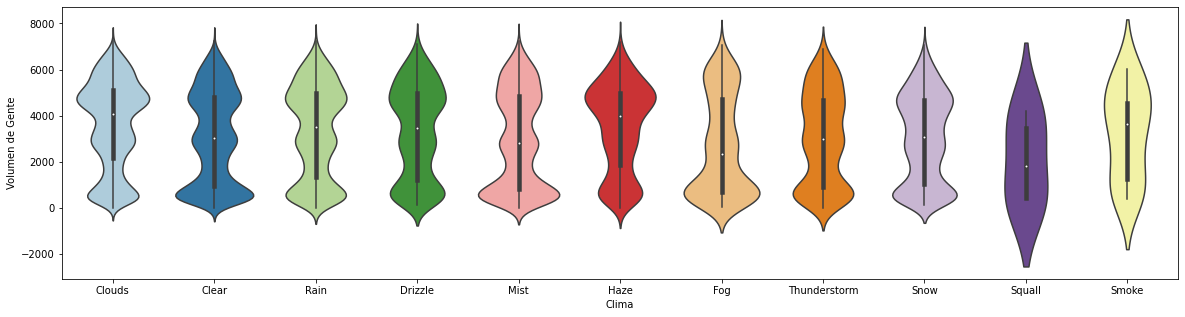

In [12]:
plt.figure( figsize=(20,5))

sns.violinplot(x= "weather_main", y= "traffic_volume", data=df, palette="Paired")
#plt.set_tittle("Distribución clima por día/hora")
plt.ylabel("Volumen de Gente")
plt.xlabel("Clima")


Text(0, 0.5, 'Descripción del tiempo')

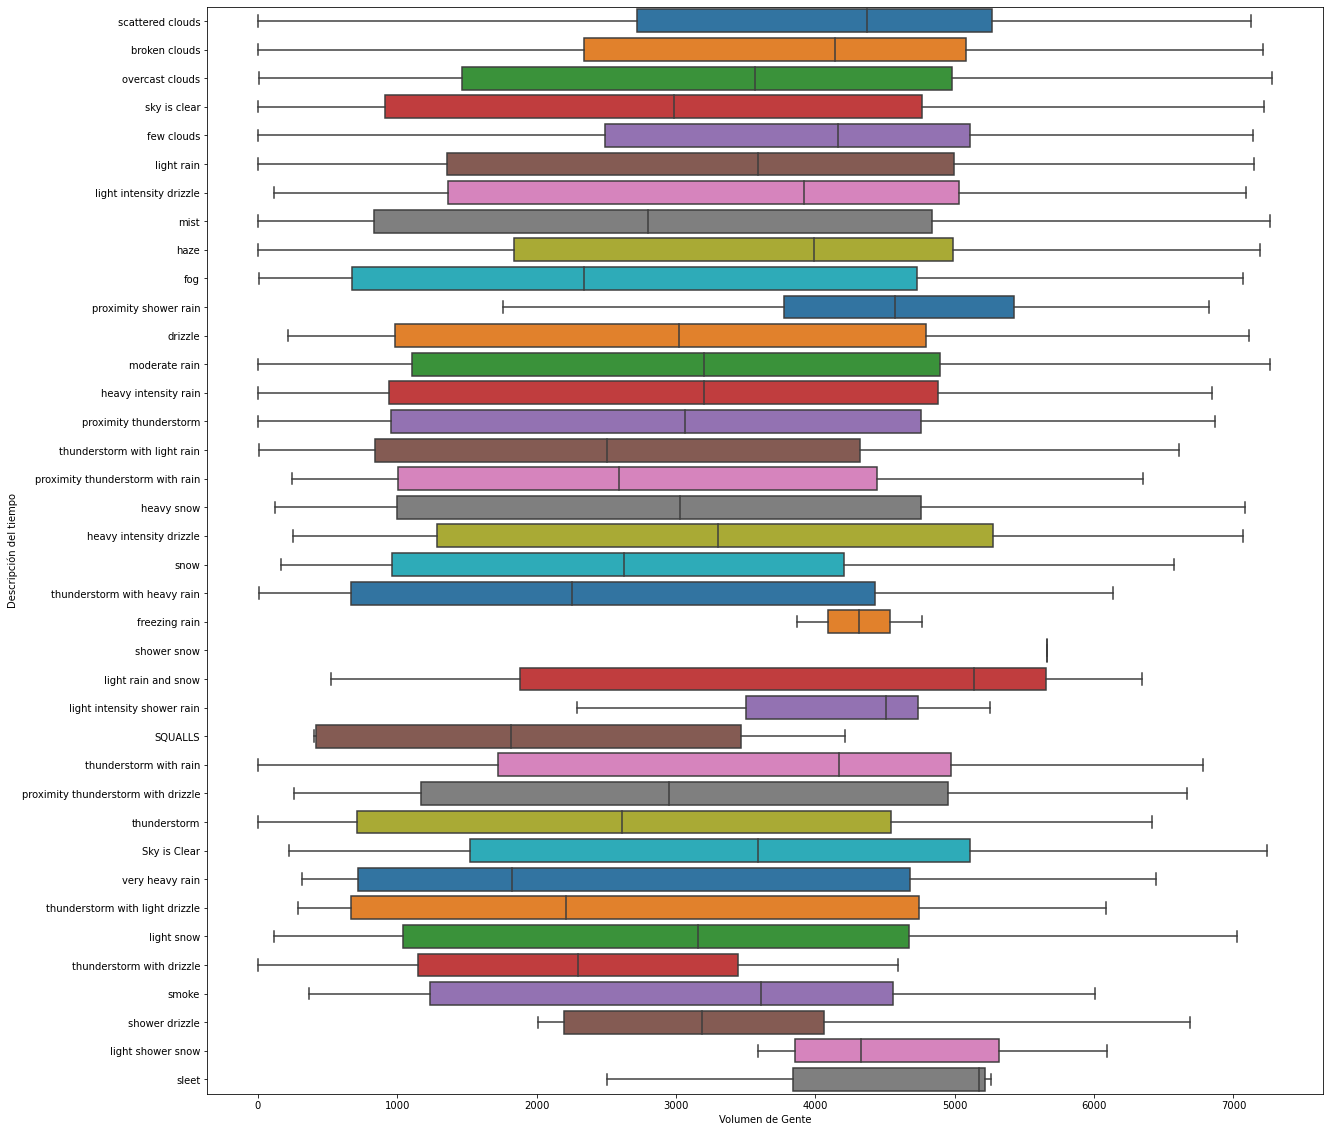

In [13]:
plt.figure(figsize=(20, 20))

sns.boxplot(y="weather_description", x= "traffic_volume", data= df, palette="tab10")
plt.xlabel("Volumen de Gente")
plt.ylabel("Descripción del tiempo")


Vemos que no tiene sentido que valoremos está columna"weather_description" porque tiene información mejor categorizada para nuestro estudio la de "weather_main"

Text(0, 0.5, 'Descripción del tiempo')

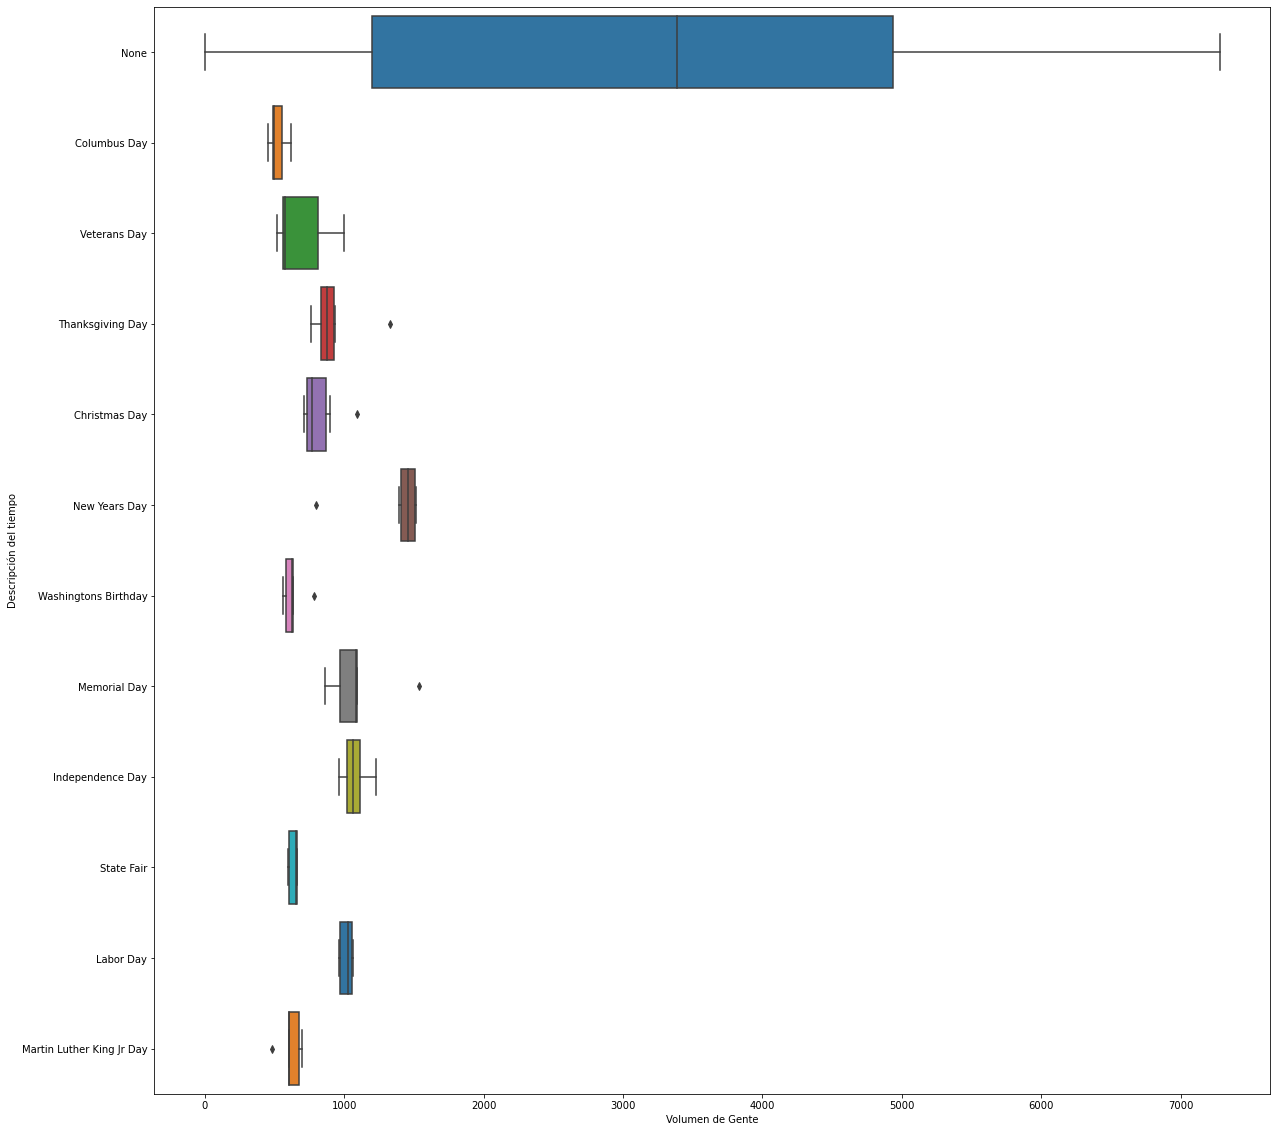

In [15]:
plt.figure(figsize=(20, 20))

sns.boxplot(y="holiday", x= "traffic_volume", data= df, palette="tab10")
plt.xlabel("Volumen de Gente")
plt.ylabel("Descripción del tiempo")

KeyError: "['MEDV'] not found in axis"

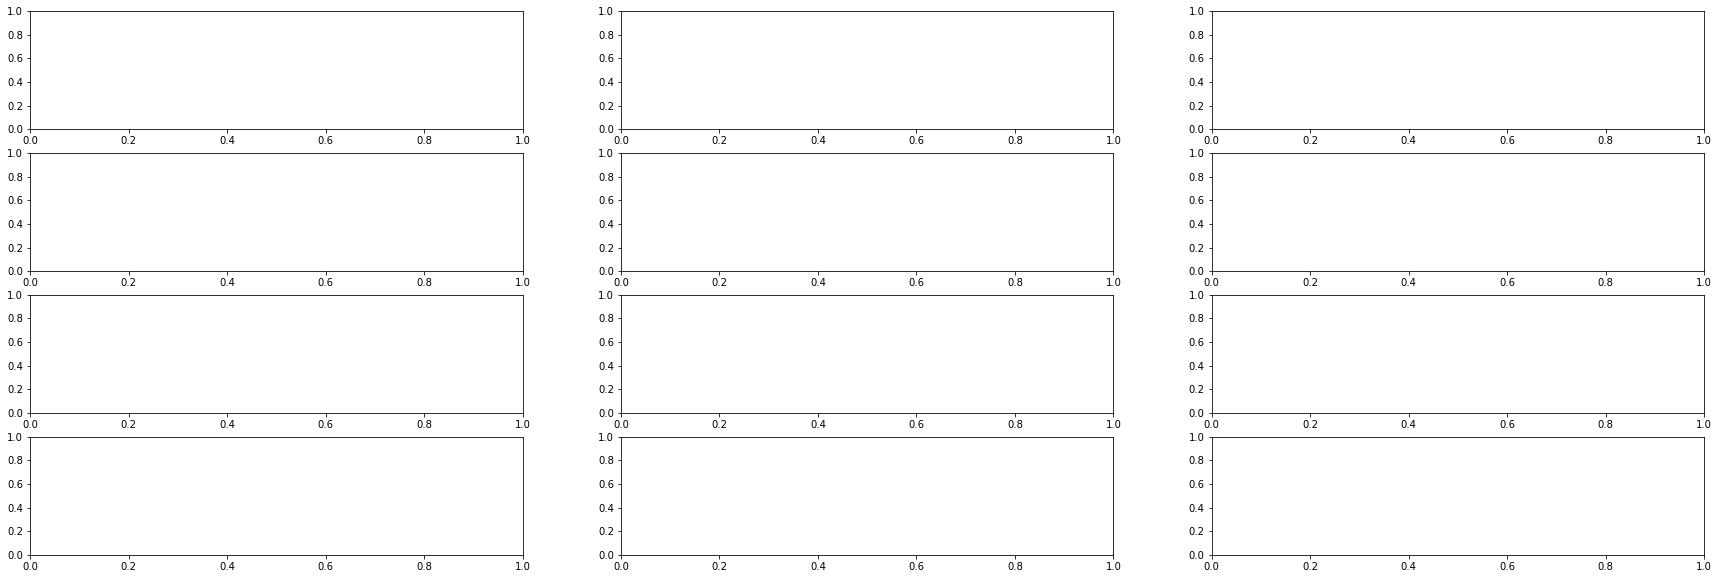

In [14]:

# iniciamos los subplots
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('MEDV', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'MEDV',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

___

- Independencia de las variables
